# Desafío - Pruebas de hipótesis
- Karen Cortés
- Constanza Córdova
- Gustavo Lizama

## 1. Evaluar juicios de hipótesis
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

#### 1.1. Encuesta adopción homoparental

75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
- El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
- Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
- Con un valor de prueba p=11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

#### Hipótesis nula: Ambos porcentajes  de adopción homoparental porcentajes no son diferentes

#### ($H_{o}: {p}_{\textsf{1}} = {p}_{\textsf{2}}$).

#### Hipótesis alternativa: Existe una diferencia substancial entre ambos porcentajes de adopción homoparental

#### ($H_{a}: {p}_{\textsf{1}} \neq {p}_{\textsf{2}}$).

#### donde: 
    - estadistico de contraste: 11.83
    - puntaje de corte: 2.58


##### Respuesta: 
dado que el estadistico de constraste se aleja bastante del puntaje de corte, la hipotesis nula se rechaza

#### 1.2. Niveles de consumo de alcohol
Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

##### Respuesta: 
De acuerdo al enunciado no hay suficientes datos para concluir algo.

## 2. Importe la base de datos utilizada la sesión presencial anterior
Agrege una serie de variables binarias por cada continente de la variable region.<br>
De manera similar a la sesión anterior, enfóquese en las siguientes variables: Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('nations.csv', encoding='gbk')

In [3]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


##### Agrege una serie de variables binarias por cada continente de la variable region.

In [6]:
tmp = df['region'].unique()

for i, n in enumerate(tmp):
    df[n] = np.where(df['region']==n, 1, 0)

In [7]:
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


## 3. Implemente una función de prueba de hipótesis a mano
La función debe ingresar los siguientes argumentos:
- df : La tabla de datos.
- variable : La variable a analizar.
- binarize : El indicador binario a utilizar.

In [8]:
def prueba_hipotesis(df, variable, binarize):
    variable_1 = df.query(binarize +'== 1')[variable].dropna()
    variable_0 = df.query(binarize +'== 0')[variable].dropna()
    
    t, pval = stats.ttest_ind(variable_1, variable_0)

    media_1 = np.mean(variable_1)
    media_0 = np.mean(variable_0)

    diferencia = media_1 - media_0
    
    print('Continente: ', binarize,' Variable: ', variable)
    print('t: ',t)
    print('pval: ', pval)
    print('media_1: ', media_1)
    print('media_0: ', media_0)
    print('diferencia medias: ', diferencia)
    print('\n \t ********')
    

### Funcion evaluada para variable: chldmort por región

In [9]:
regiones = df['region'].unique()

for i, n in enumerate(regiones):
    prueba_hipotesis(df, 'chldmort', n)

Continente:  Africa  Variable:  chldmort
t:  14.17367667788517
pval:  1.244572684496239e-31
media_1:  109.75
media_0:  24.74822695035461
diferencia medias:  85.0017730496454

 	 ********
Continente:  Americas  Variable:  chldmort
t:  -3.08561941878294
pval:  0.00233300081092071
media_1:  23.264285714285716
media_0:  53.052215189873415
diferencia medias:  -29.7879294755877

 	 ********
Continente:  Asia  Variable:  chldmort
t:  -1.602738386676471
pval:  0.1106448646711535
media_1:  37.104166666666664
media_0:  51.141379310344824
diferencia medias:  -14.03721264367816

 	 ********
Continente:  Europe  Variable:  chldmort
t:  -6.262400472976766
pval:  2.4506589890929246e-09
media_1:  7.046511627906977
media_0:  59.29
diferencia medias:  -52.243488372093026

 	 ********
Continente:  Oceania  Variable:  chldmort
t:  -0.6277779742677246
pval:  0.5308992371716935
media_1:  39.416666666666664
media_0:  48.34410112359551
diferencia medias:  -8.927434456928843

 	 ********


### Funcion evaluada para variable: adfert por región

In [10]:
for i, n in enumerate(regiones):
    prueba_hipotesis(df, 'adfert', n)

Continente:  Africa  Variable:  adfert
t:  9.444409431356496
pval:  1.2481674170069097e-17
media_1:  92.72115342892133
media_0:  36.83450711361119
diferencia medias:  55.88664631531014

 	 ********
Continente:  Americas  Variable:  adfert
t:  1.7662790555775358
pval:  0.07893816171889229
media_1:  63.659999847412095
media_0:  49.20691819985708
diferencia medias:  14.453081647555017

 	 ********
Continente:  Asia  Variable:  adfert
t:  -3.386269877966909
pval:  0.0008592686089688165
media_1:  33.86530622170896
media_0:  57.87999988671007
diferencia medias:  -24.014693665001104

 	 ********
Continente:  Europe  Variable:  adfert
t:  -6.797972597840039
pval:  1.3040875269879142e-10
media_1:  15.53720931396928
media_0:  62.14503303268887
diferencia medias:  -46.607823718719594

 	 ********
Continente:  Oceania  Variable:  adfert
t:  -0.6231321887004015
pval:  0.5339371393742243
media_1:  44.99333400726322
media_0:  52.38603339847906
diferencia medias:  -7.392699391215835

 	 ********


### Funcion evaluada para variable: life por región

In [11]:
for i, n in enumerate(regiones):
    prueba_hipotesis(df, 'life', n)

Continente:  Africa  Variable:  life
t:  -15.174602759471485
pval:  1.0713988391633837e-34
media_1:  56.49038454202504
media_0:  73.21114999475614
diferencia medias:  -16.7207654527311

 	 ********
Continente:  Americas  Variable:  life
t:  3.138414667252044
pval:  0.0019666060685098454
media_1:  73.45142800467355
media_0:  67.68983217155409
diferencia medias:  5.761595833119458

 	 ********
Continente:  Asia  Variable:  life
t:  1.7346722179790488
pval:  0.08440370105334277
media_1:  70.87244882388991
media_0:  68.0050572625522
diferencia medias:  2.867391561337712

 	 ********
Continente:  Europe  Variable:  life
t:  6.735355531733241
pval:  1.8491610377704372e-10
media_1:  76.94573619753815
media_0:  66.38951416520882
diferencia medias:  10.55622203232933

 	 ********
Continente:  Oceania  Variable:  life
t:  0.342110739720379
pval:  0.7326417413000359
media_1:  69.58444468180339
media_0:  68.65763477772973
diferencia medias:  0.9268099040736644

 	 ********


## 4. Implemente una función que grafique los histogramas para ambas muestras.
Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
- tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
- Incluya los argumentos alpha y label .
<br>Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [19]:
def dibuja_hist1(df, variable, binarize, alpha_hist, label_hist):
    variable_1 = df.query(binarize +'== 1')[variable].dropna()
    variable_0 = df.query(binarize +'== 0')[variable].dropna()
    
    media_1 = round(np.mean(variable_1),2)
    media_0 = round(np.mean(variable_0),2)
    
    plt.hist(variable_1, alpha=alpha_hist, label= binarize , color='green', density=True)
    plt.axvline(media_1, label= f'media de {binarize}: '+str(media_1), color='tomato')
    plt.hist(variable_0, alpha=alpha_hist, label='Otras regiones', color='grey', density=True)
    plt.axvline(media_0, label= 'media otras regiones: '+str(media_0), color='blue')
    plt.xlabel(label_hist)
    plt.title(binarize)
    plt.legend()
    

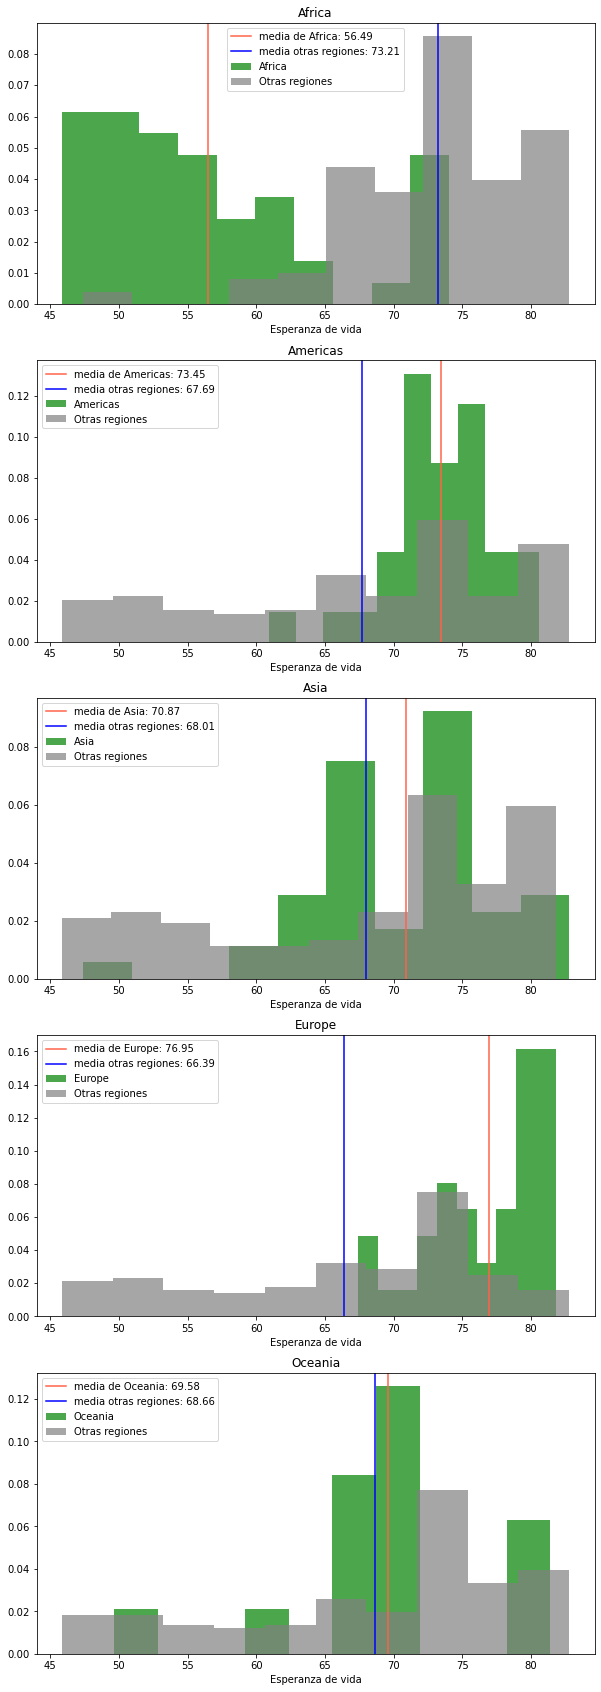

In [30]:
plt.figure(figsize=(10,30))

regiones = df['region'].unique()
for i, n in enumerate(regiones):
    plt.subplot(5, 1, i+1)
    dibuja_hist1(df, 'life', n, 0.7, 'Esperanza de vida')

Esperanda de vida: se observa que Africa es la región con menor esperanza de vida promedio que las otras regiones, mientras que Europa es la región que tiene mayor esperanza de vida promedio que las otras regiones

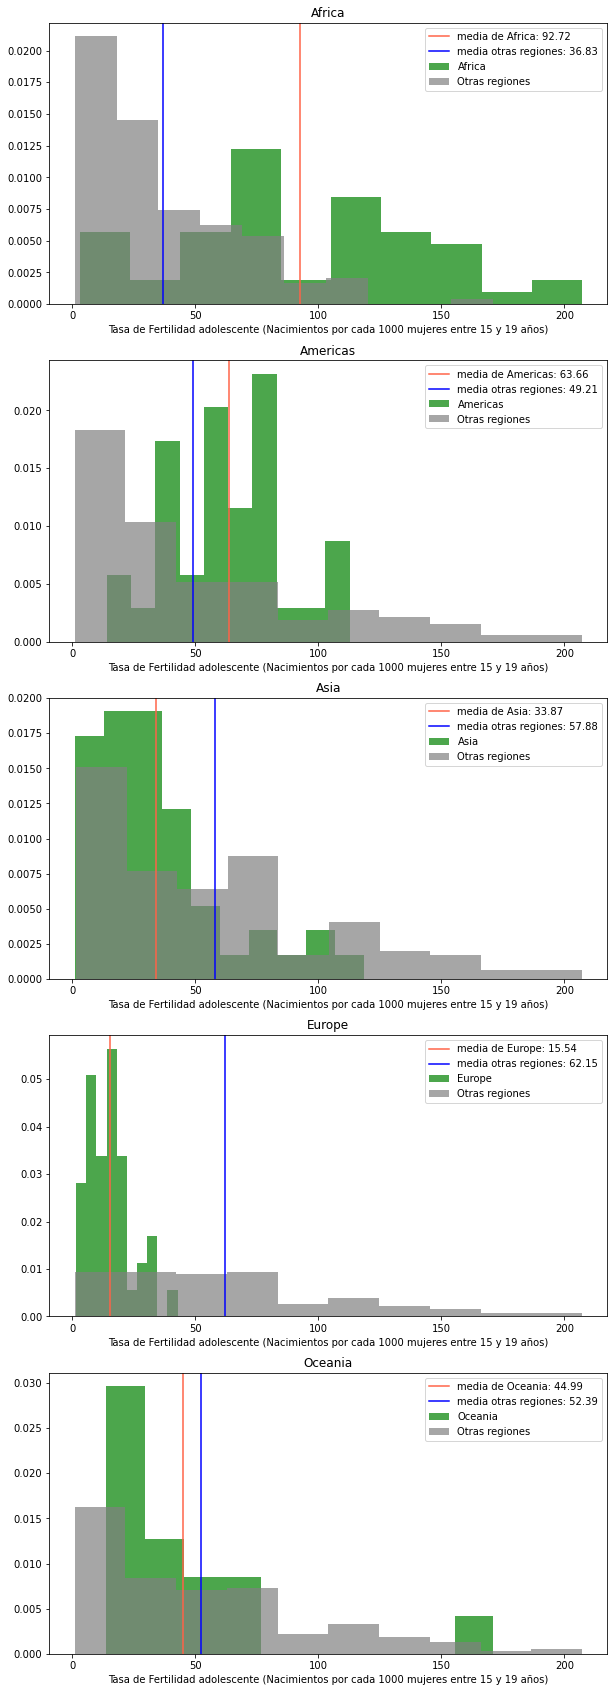

In [34]:
plt.figure(figsize=(10,30))

for i, n in enumerate(regiones):
    plt.subplot(5, 1, i+1)
    dibuja_hist1(df, 'adfert', n, 0.7, 'Tasa de Fertilidad adolescente (Nacimientos por cada 1000 mujeres entre 15 y 19 años)')

Fertilidad adolescente: Se observa que Africa es la región con mayor tasa promedio de fertilidad adolescente respecto al promedio de otras regiones. Europa es la región con memor tasa promedio de fertilidad adolescente respecto a otras regiones

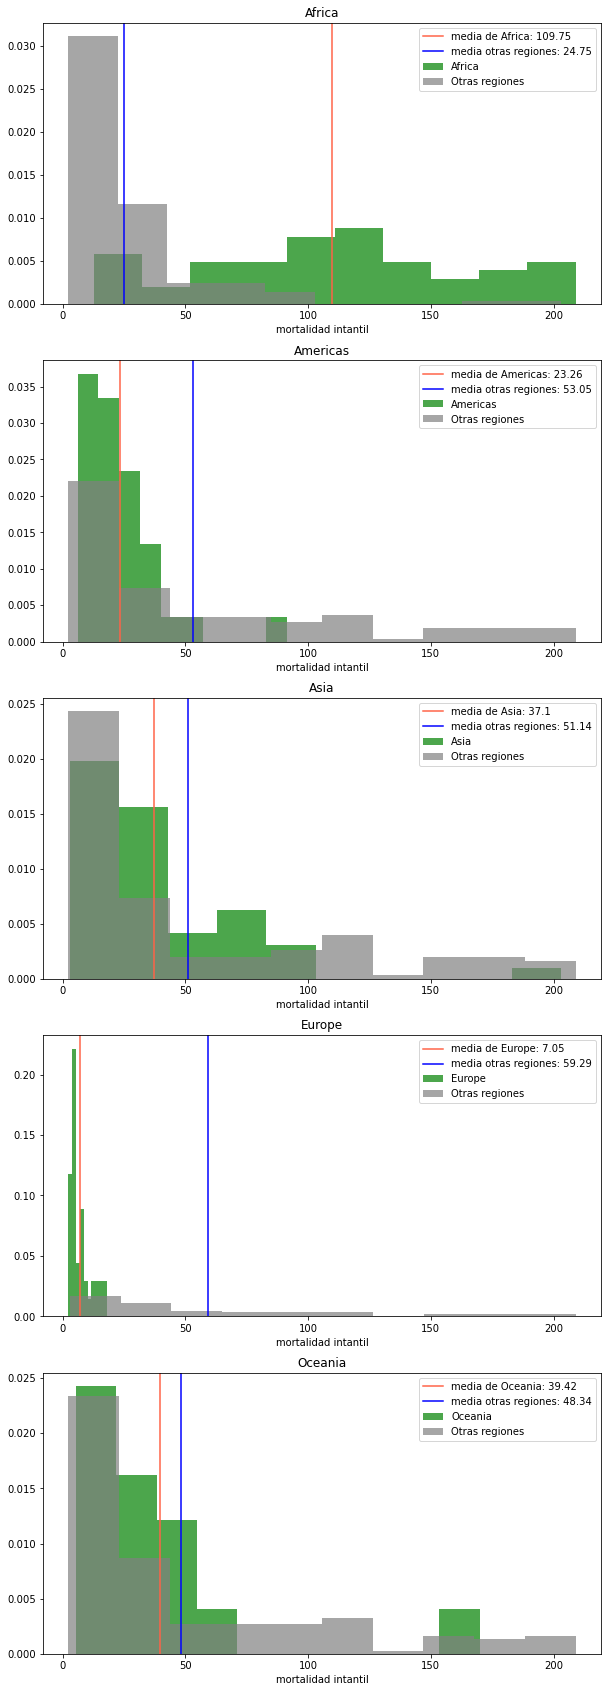

In [36]:
plt.figure(figsize=(10,30))

for i, n in enumerate(regiones):
    plt.subplot(5, 1, i+1)
    dibuja_hist1(df, 'chldmort', n, 0.7, 'mortalidad intantil')

### Mortalidad infantil: Al igual que en los casos anteriores Africa es la región que presenta mayor tasa de motalidad infantil promedio respecto a otras regiones. En cambio Europa es la región con menor tasa promedio de mortalidad intantil